<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/Geospasial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

<Axes: >

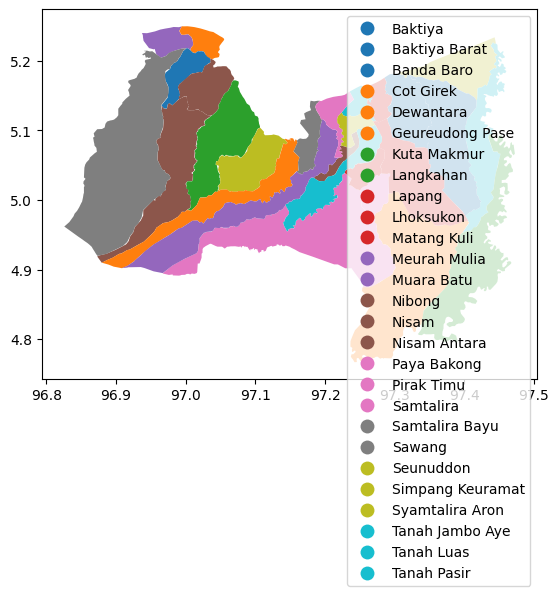

In [15]:
dt=gpd.read_file('Aceh_utara.zip')
dt.plot(column='nama', legend=True )

/tmp/ipython-input-2014635938.py:24: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=ax, color=color, edgecolor='black')


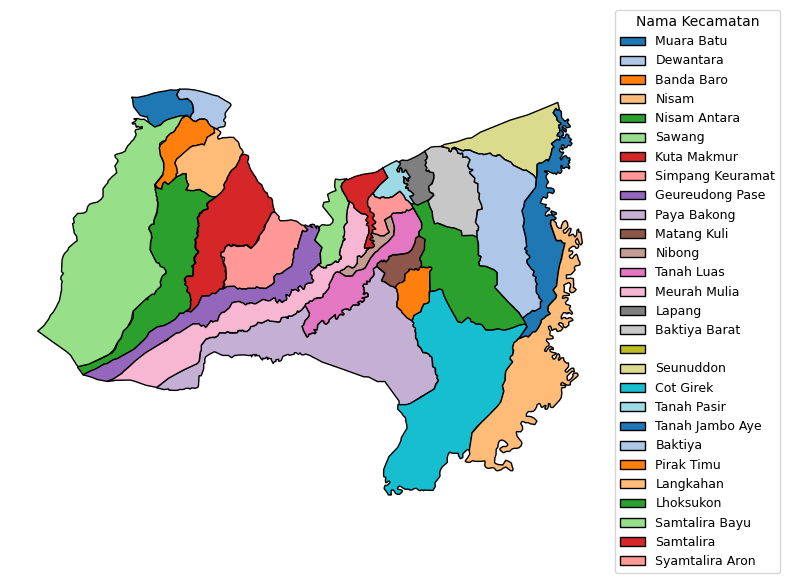

In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch

# Baca data shapefile Aceh Utara
dt = gpd.read_file("Aceh_utara.zip")

# Buat figura
fig, ax = plt.subplots(figsize=(8, 6))

# Daftar nama kecamatan unik
unique_names = dt['nama'].unique()

# Pilih palet warna
colors = plt.cm.tab20.colors  # Bisa juga tab10, Set3, Paired, dll

# Simpan handle legend
legend_elements = []

# Plot tiap kecamatan dengan warna berbeda
for i, name in enumerate(unique_names):
    subset = dt[dt['nama'] == name]
    color = colors[i % len(colors)]
    subset.plot(ax=ax, color=color, edgecolor='black')
    legend_elements.append(Patch(facecolor=color, edgecolor='black', label=name))

# Tambahkan legend di luar peta
ax.legend(handles=legend_elements, title="Nama Kecamatan",
          loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, title_fontsize=10)

# Hilangkan axis
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [35]:
df=pd.read_excel('acehutara_data.xlsx')
df.head()

,kode,nama,Luas,penduduk
0,1,Muara Batu,76.299527,24600
1,2,Dewantara,52.494906,29600
2,3,Banda Baru,85.241222,34600
3,4,Nisam,119.713605,39600
4,4,Kuta Makmur,274.814261,44600


In [38]:
import pandas as pd
from sklearn.cluster import KMeans

# Baca file Excel
file_path = "acehutara_data.xlsx"
data = pd.read_excel(file_path)

# Pilih kolom numerik untuk K-Means
X = data[["Luas", "penduduk"]]

# Terapkan K-Means (3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
data["cluster"] = kmeans.fit_predict(X)

# Tambahkan centroid untuk referensi
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=["Luas_centroid", "Penduduk_centroid"])

# Gabungkan hasil klaster
data_clustered = data.copy()

print(data_clustered)



    kode              nama        Luas  penduduk  cluster
0      1        Muara Batu   76.299527     24600        1
1      2         Dewantara   52.494906     29600        1
2      3        Banda Baru   85.241222     34600        1
3      4             Nisam  119.713605     39600        2
4      4       Kuta Makmur  274.814261     44600        2
5      6      Nisam Antara  338.517557     49600        2
6      7            Sawang  776.067750     54600        2
7      8  Simpang Keuramat  180.455214     59600        2
8      7    Geuredong Pase  221.400951     64600        0
9     10    Samtalira Baru   73.276949     69600        0
10    11      Meurah Mulia  349.034234     74600        0
11    12         Samtalira   64.120756     79600        0
12    13      Tanah Pasirr   33.568312     84600        0
13    13            Lapang   56.012111     89600        0
14    14   Syamtalira Aron   45.178840     82600        0
15    15            Nibong   27.663262     75600        0
16    16      

In [40]:
import geopandas as gpd
import pandas as pd

# Misalnya:
# data_clustered = hasil dari K-Means
# dt = data spasial (GeoDataFrame) yang sudah dibaca dari shapefile atau GeoJSON

# Pastikan kolom 'nama' di kedua data sama formatnya (huruf besar/kecil)
data_clustered['nama'] = data_clustered['nama'].str.strip().str.title()
dt['nama'] = dt['nama'].str.strip().str.title()

# Lihat kolom dt agar tahu kolom unik
print("Kolom di data spasial:", dt.columns)

# Gabungkan data spasial dan hasil klasterisasi
merged = dt.merge(data_clustered, on='nama', how='left')

# Tampilkan hasil
merged.head()


Kolom di data spasial: Index(['kode', 'nama', 'luas', 'geometry'], dtype='object')


,kode_x,nama,luas,geometry,kode_y,Luas,penduduk,cluster
0,01,Muara Batu,NaN,"POLYGON ((96.93725 5.23983, 96.94444 5.23954, ...",1.0,76.299527,24600.0,1.0
1,02,Dewantara,NaN,"POLYGON ((96.99523 5.2494, 96.99835 5.2494, 97...",2.0,52.494906,29600.0,1.0
2,03,Banda Baro,NaN,"POLYGON ((97.00106 5.21786, 97.00106 5.21786, ...",NaN,NaN,NaN,NaN
3,04,Nisam,NaN,"POLYGON ((97.0357 5.20316, 97.03987 5.20115, 9...",4.0,119.713605,39600.0,2.0
4,05,Nisam Antara,NaN,"POLYGON ((96.96507 5.13538, 96.96511 5.13558, ...",6.0,338.517557,49600.0,2.0


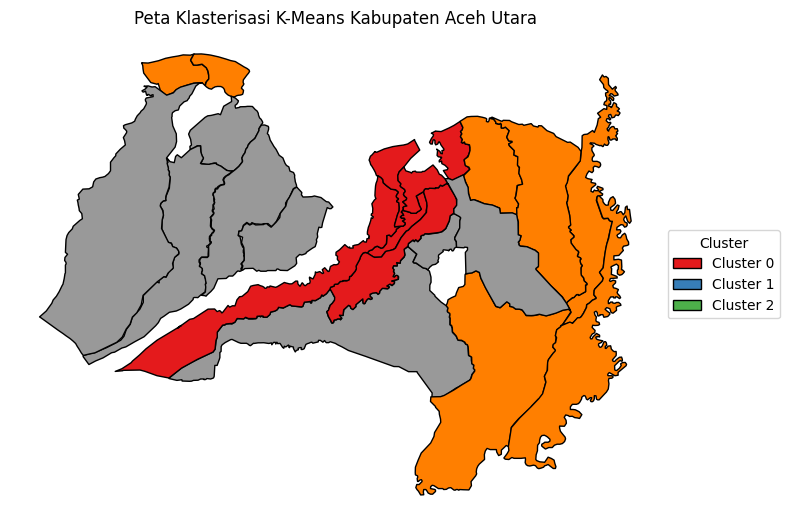

In [43]:
# ======================================================
# 📍 K-Means + Peta Spasial Kabupaten Aceh Utara
# ======================================================

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

# --- 1️⃣ Baca data spasial dan data numerik ---
# Ganti dengan nama file milikmu
dt = gpd.read_file("Aceh_utara.zip")
data_num = pd.read_excel("acehutara_data.xlsx")

# --- 2️⃣ Klasterisasi K-Means ---
X = data_num[["Luas", "penduduk"]]
kmeans = KMeans(n_clusters=3, random_state=42)
data_num["cluster"] = kmeans.fit_predict(X)

# --- 3️⃣ Normalisasi nama agar bisa digabung ---
data_num["nama"] = data_num["nama"].str.strip().str.title()
dt["nama"] = dt["nama"].str.strip().str.title()

# --- 4️⃣ Gabungkan data numerik + spasial ---
merged = dt.merge(data_num, on="nama", how="left")

# --- 5️⃣ Plot hasil klasterisasi ---
fig, ax = plt.subplots(figsize=(8, 6))
merged.plot(column="cluster", cmap="Set1", legend=False, ax=ax, edgecolor="black")

# Buat legend manual agar warna dan label konsisten
clusters = sorted(merged["cluster"].dropna().unique())
colors = plt.cm.Set1.colors
legend_elements = [Patch(facecolor=colors[int(c)], edgecolor='black', label=f'Cluster {int(c)}')
                   for c in clusters]

ax.legend(handles=legend_elements, title="Cluster", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Peta Klasterisasi K-Means Kabupaten Aceh Utara", fontsize=12)
ax.set_axis_off()
plt.tight_layout()
plt.show()


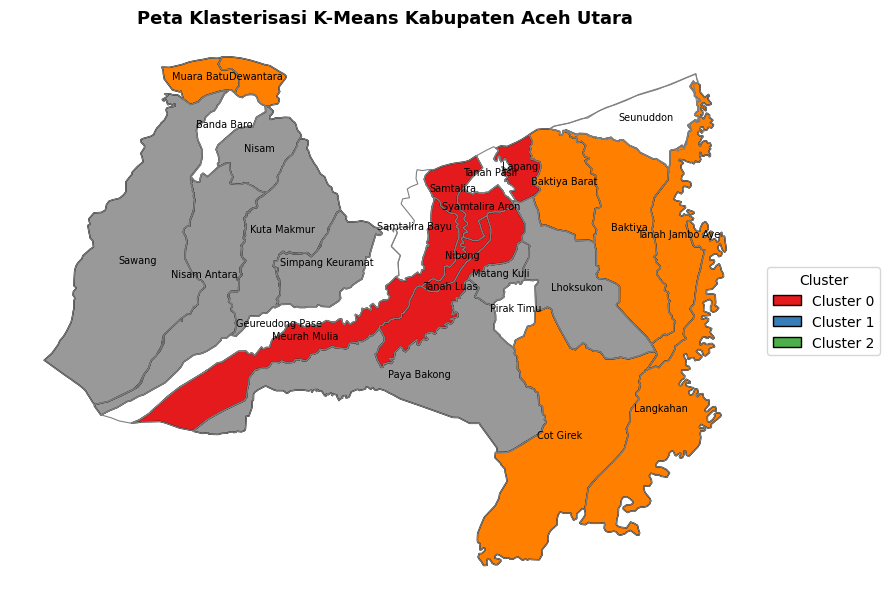

In [44]:
# ======================================================
# 📍 K-Means Clustering + Overlay Peta Asli Aceh Utara
# ======================================================

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

# --- 1️⃣ Baca data spasial asli dan data numerik ---
dt = gpd.read_file("Aceh_utara.zip")                # Peta dasar Aceh Utara
data_num = pd.read_excel("acehutara_data.xlsx")     # Data numerik (luas, penduduk)

# --- 2️⃣ Lakukan klasterisasi K-Means ---
X = data_num[["Luas", "penduduk"]]
kmeans = KMeans(n_clusters=3, random_state=42)
data_num["cluster"] = kmeans.fit_predict(X)

# --- 3️⃣ Samakan format nama agar bisa digabung ---
data_num["nama"] = data_num["nama"].str.strip().str.title()
dt["nama"] = dt["nama"].str.strip().str.title()

# --- 4️⃣ Gabungkan data spasial dengan hasil klasterisasi ---
merged = dt.merge(data_num, on="nama", how="left")

# --- 5️⃣ Buat figur peta ---
fig, ax = plt.subplots(figsize=(9, 7))

# Layer 1 → Peta dasar (outline Aceh Utara)
dt.boundary.plot(ax=ax, color="gray", linewidth=0.8, label="Batas Wilayah")

# Layer 2 → Peta hasil klasterisasi (berwarna)
merged.plot(column="cluster", cmap="Set1", legend=False, ax=ax, edgecolor="black")

# --- 6️⃣ Tambahkan legend manual untuk klaster ---
clusters = sorted(merged["cluster"].dropna().unique())
colors = plt.cm.Set1.colors
legend_elements = [
    Patch(facecolor=colors[int(c)], edgecolor='black', label=f'Cluster {int(c)}')
    for c in clusters
]
ax.legend(handles=legend_elements, title="Cluster", loc='center left', bbox_to_anchor=(1, 0.5))

# --- 7️⃣ Tambahkan label nama kecamatan ---
for idx, row in merged.iterrows():
    if row.geometry.centroid.is_valid:
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y,
                 row["nama"], fontsize=7, ha='center')

# --- 8️⃣ Estetika dan layout ---
ax.set_title("Peta Klasterisasi K-Means Kabupaten Aceh Utara", fontsize=13, fontweight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


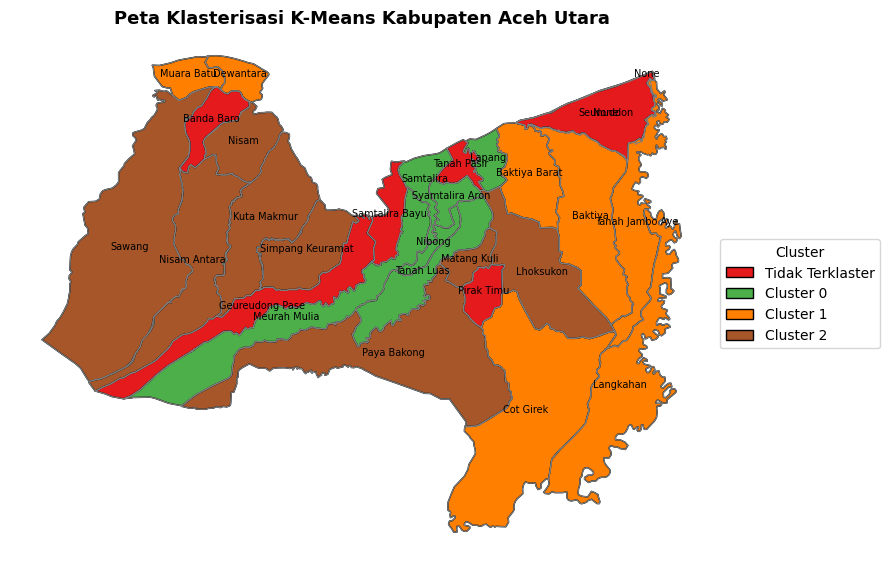

In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Patch
import matplotlib as mpl

# --- 1️⃣ Baca data ---
dt = gpd.read_file("Aceh_utara.zip")
data_num = pd.read_excel("acehutara_data.xlsx")

# --- 2️⃣ Klasterisasi K-Means ---
X = data_num[["Luas", "penduduk"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data_num["cluster"] = kmeans.fit_predict(X)

# --- 3️⃣ Normalisasi nama untuk join ---
data_num["nama"] = data_num["nama"].astype(str).str.strip().str.title()
dt["nama"] = dt["nama"].astype(str).str.strip().str.title()

# --- 4️⃣ Merge hasil klaster ke data spasial ---
merged = dt.merge(data_num, on="nama", how="left")

# --- 5️⃣ Pastikan kolom 'cluster' tidak NaN ---
merged["cluster"] = merged["cluster"].fillna(-1)

# --- 6️⃣ Tentukan warna langsung dari colormap (Matplotlib 3.8+) ---
clusters = sorted(merged["cluster"].unique())
cmap = mpl.colormaps["Set1"]  # cara baru, tidak ada argumen kedua
color_map = {c: cmap(i / len(clusters)) for i, c in enumerate(clusters)}
merged["color"] = merged["cluster"].map(color_map)

# --- 7️⃣ Plot dengan warna sesuai cluster ---
fig, ax = plt.subplots(figsize=(9, 7))

# Layer dasar (batas wilayah)
dt.boundary.plot(ax=ax, color="gray", linewidth=0.8)

# Layer hasil klaster
merged.plot(color=merged["color"], ax=ax, edgecolor="black")

# --- 8️⃣ Buat legend dari warna aktual di peta ---
legend_elements = [
    Patch(facecolor=color_map[c], edgecolor='black',
          label="Tidak Terklaster" if c == -1 else f'Cluster {int(c)}')
    for c in clusters
]
ax.legend(handles=legend_elements, title="Cluster",
          loc='center left', bbox_to_anchor=(1, 0.5))

# --- 9️⃣ Tambahkan label nama kecamatan ---
for idx, row in merged.iterrows():
    try:
        centroid = row.geometry.centroid
        plt.text(centroid.x, centroid.y, row["nama"], fontsize=7, ha='center')
    except Exception:
        continue  # lewati jika ada geometri kosong

# --- 🔟 Layout & tampilan ---
ax.set_title("Peta Klasterisasi K-Means Kabupaten Aceh Utara",
             fontsize=13, fontweight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


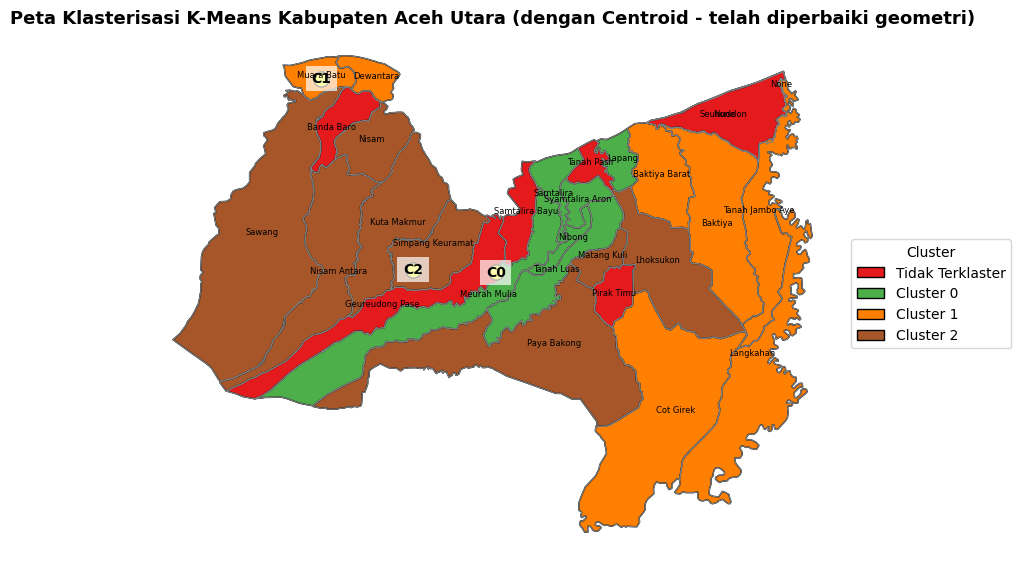

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Patch
import matplotlib as mpl
from shapely.geometry import Point
from shapely.ops import unary_union

# --- 1. Baca data ---
dt = gpd.read_file("Aceh_utara.zip")
data_num = pd.read_excel("acehutara_data.xlsx")

# --- 2. KMeans ---
X = data_num[["Luas", "penduduk"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data_num["cluster"] = kmeans.fit_predict(X)

# --- 3. Normalisasi nama untuk join ---
data_num["nama"] = data_num["nama"].astype(str).str.strip().str.title()
dt["nama"] = dt["nama"].astype(str).str.strip().str.title()

# --- 4. Merge ---
merged = dt.merge(data_num, on="nama", how="left")
merged["cluster"] = merged["cluster"].fillna(-1)

# --- 5. Pastikan geometri valid: perbaiki jika perlu ---
def fix_geom(g):
    if g is None or g.is_empty:
        return None
    try:
        if not g.is_valid:
            # buffer(0) adalah trik umum untuk memperbaiki banyak invalid geometry
            g2 = g.buffer(0)
            if g2 is None or g2.is_empty:
                return None
            return g2
        else:
            return g
    except Exception:
        # jika buffer juga gagal, kembalikan None
        try:
            return g.buffer(0)
        except Exception:
            return None

# Terapkan perbaikan
merged['geometry'] = merged['geometry'].apply(fix_geom)

# Buang baris tanpa geometri valid
merged = merged[~(merged['geometry'].isnull())].copy()
merged = merged.reset_index(drop=True)

# Sekarang safe untuk dissolve:
# Hanya untuk cluster yang valid (exclude -1)
valid_clusters_gdf = merged[merged['cluster'] != -1].copy()

# Jika tidak ada fitur yang terklaster, hindari dissolve
if not valid_clusters_gdf.empty:
    # Dissolve berdasarkan cluster, lalu coba hitung centroid
    dissolved = valid_clusters_gdf.dissolve(by='cluster')

    # Pastikan dissolved geometries valid (apply fix lagi jika diperlukan)
    dissolved['geometry'] = dissolved['geometry'].apply(lambda g: fix_geom(g) if g is not None else None)

    # Centroid: kalau centroid GEOS bermasalah, pakai representative_point()
    centroids_list = []
    for idx, row in dissolved.iterrows():
        geom = row.geometry
        if geom is None or geom.is_empty:
            continue
        try:
            c = geom.centroid
            # jika centroid valid dan dalam polygon, terima
            if c.is_valid and (geom.contains(c) or geom.touches(c)):
                centroids_list.append({'cluster': idx, 'geometry': c})
            else:
                # fallback: representative_point (selalu di dalam)
                rp = geom.representative_point()
                centroids_list.append({'cluster': idx, 'geometry': rp})
        except Exception:
            # fallback general
            rp = geom.representative_point()
            centroids_list.append({'cluster': idx, 'geometry': rp})

    centroids_gdf = gpd.GeoDataFrame(centroids_list, crs=merged.crs)
else:
    # tidak ada cluster terklaster
    centroids_gdf = gpd.GeoDataFrame(columns=['cluster','geometry'], crs=merged.crs)

# --- 6. Warna dan plotting (sama seperti sebelumnya) ---
clusters = sorted(merged["cluster"].unique())
cmap = mpl.colormaps["Set1"]
color_map = {c: cmap(i / len(clusters)) for i, c in enumerate(clusters)}
merged["color"] = merged["cluster"].map(color_map)

fig, ax = plt.subplots(figsize=(9, 7))

# outline base map
dt.boundary.plot(ax=ax, color="gray", linewidth=0.8)

# plot clusters (warna sudah diberikan)
merged.plot(color=merged["color"], ax=ax, edgecolor="black")

# plot centroid jika ada
if not centroids_gdf.empty:
    centroids_gdf.plot(ax=ax, color="yellow", markersize=120, edgecolor="black", zorder=3)
    for idx, row in centroids_gdf.iterrows():
        plt.text(row.geometry.x, row.geometry.y, f"C{int(row['cluster'])}",
                 fontsize=10, fontweight="bold", color="black",
                 ha="center", va="center", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# legend
legend_elements = [
    Patch(facecolor=color_map[c], edgecolor='black',
          label="Tidak Terklaster" if c == -1 else f'Cluster {int(c)}')
    for c in clusters
]
ax.legend(handles=legend_elements, title="Cluster", loc='center left', bbox_to_anchor=(1, 0.5))

# label nama kecamatan (gunakan representative_point agar teks selalu di dalam)
for idx, row in merged.iterrows():
    try:
        rep = row.geometry.representative_point()
        plt.text(rep.x, rep.y, row["nama"], fontsize=6, ha='center')
    except Exception:
        continue

ax.set_title("Peta Klasterisasi K-Means Kabupaten Aceh Utara (dengan Centroid - telah diperbaiki geometri)",
             fontsize=13, fontweight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()
